# Task - 3 CAR PRICE PREDICTION SYSTEM WITH MACHINE LEARNING

Description

💡 The price of a car depends on a lot of factors like the goodwill of the brand of the car,features of the car, horsepower and the mileage it gives & more.

💡 Car price prediction is one of the major research areas in machine learning.

💡 In this assignment we have to train a machine learning model which will predict the price of cars using the given features of car.

# IMPORTING LIBRARIES

In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from scipy import stats
import pylab

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [181]:
df=pd.read_csv("Car.csv")

In [182]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [183]:
df.shape

(205, 26)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [185]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [186]:
df.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [187]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [188]:
df.duplicated().sum()

0

In [189]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Cleaning

In [190]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)
df.drop(columns=["CarName"],inplace=True)

In [191]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [192]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [193]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Exploratory Data Analysis 

In [194]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [195]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

1 Visualizing Price [Target feature] Feature

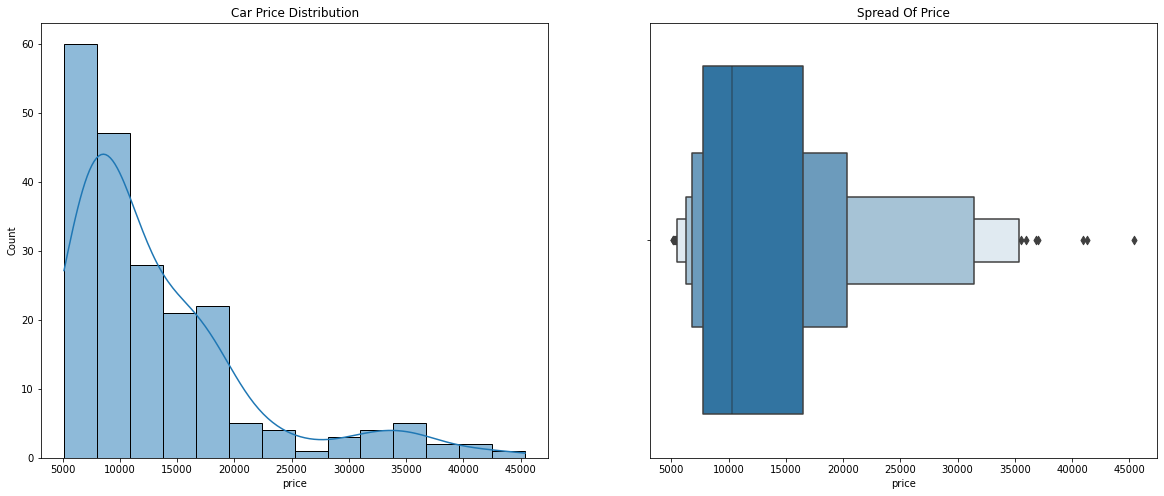

In [196]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Car Price Distribution")
sns.histplot(data=df,x='price',kde=True)

plt.subplot(1,2,2)
plt.title("Spread Of Price")
sns.boxenplot(data=df,x='price')
plt.show()

Insights

We can clearly observe that our Car Price Feature is Right Skewed.

most of the car's price is below 14000.

2 visualizing Symboling Feature

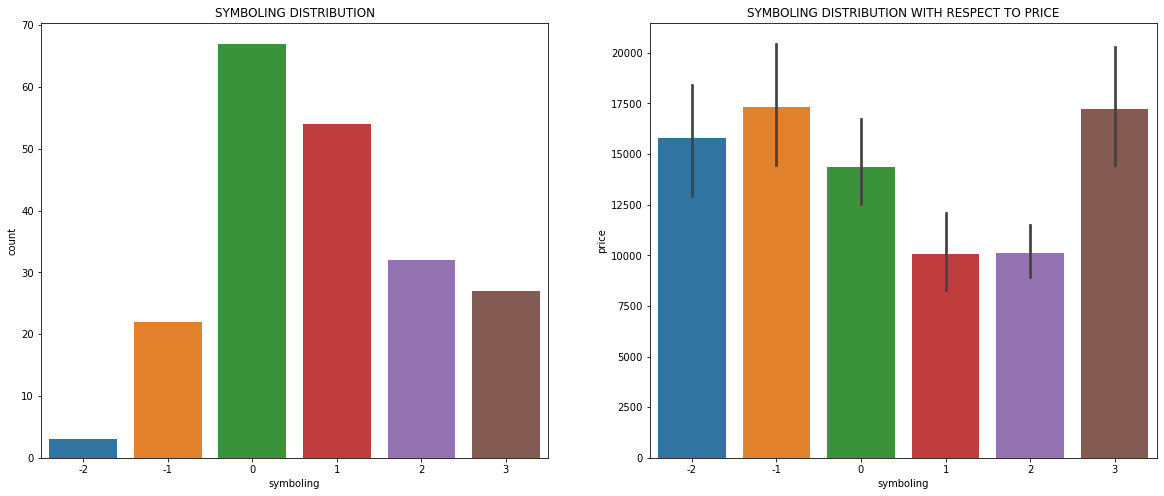

In [197]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("SYMBOLING DISTRIBUTION")
sns.countplot(df['symboling'],data=df)

plt.subplot(1,2,2)
plt.title("SYMBOLING DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['symboling'],df['price'],data=df);

Insights

* we clearly see that the most of the car has 0 symboling

* the price of car which have (-1 and 3) is highest and equal 

3 visualizing Feultype Feature

In [198]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

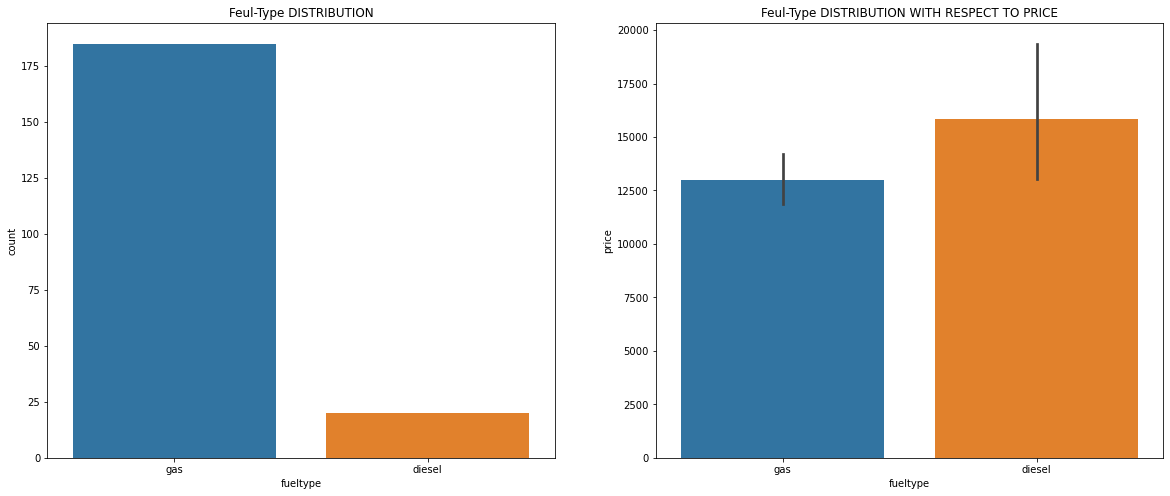

In [199]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Feul-Type DISTRIBUTION")
sns.countplot(df['fueltype'],data=df)

plt.subplot(1,2,2)
plt.title("Feul-Type DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['fueltype'],df['price'],data=df);

Insights 

* most of the car has gas feul type but price of diesel car is higher

4 Visualize Aspiration feature

In [200]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

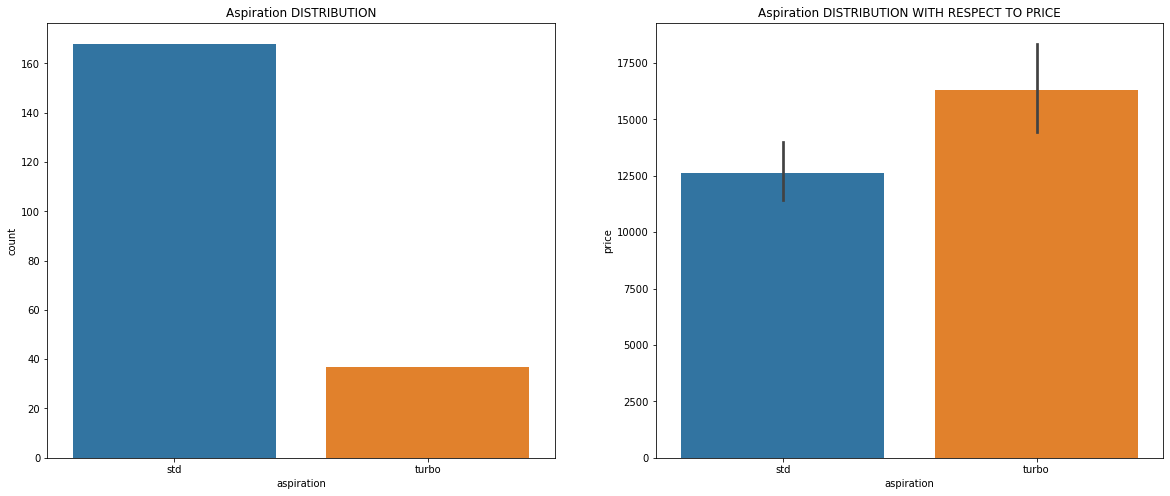

In [201]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Aspiration DISTRIBUTION")
sns.countplot(df['aspiration'],data=df)

plt.subplot(1,2,2)
plt.title("Aspiration DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['aspiration'],df['price'],data=df);

Insights 

* most of the aspiration of car is std but price is higher for turbo

5 visualize doornumber feature

In [202]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

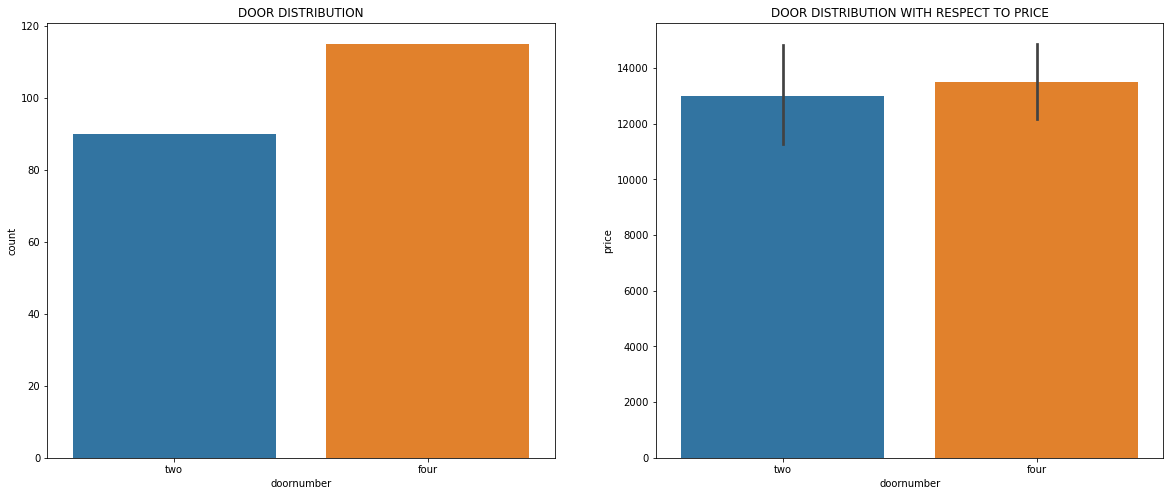

In [203]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("DOOR DISTRIBUTION")
sns.countplot(df['doornumber'],data=df)

plt.subplot(1,2,2)
plt.title("DOOR DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['doornumber'],df['price'],data=df);

Insights

* most of the car has four door and also have highest price

6. visualize carbody feature

In [204]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

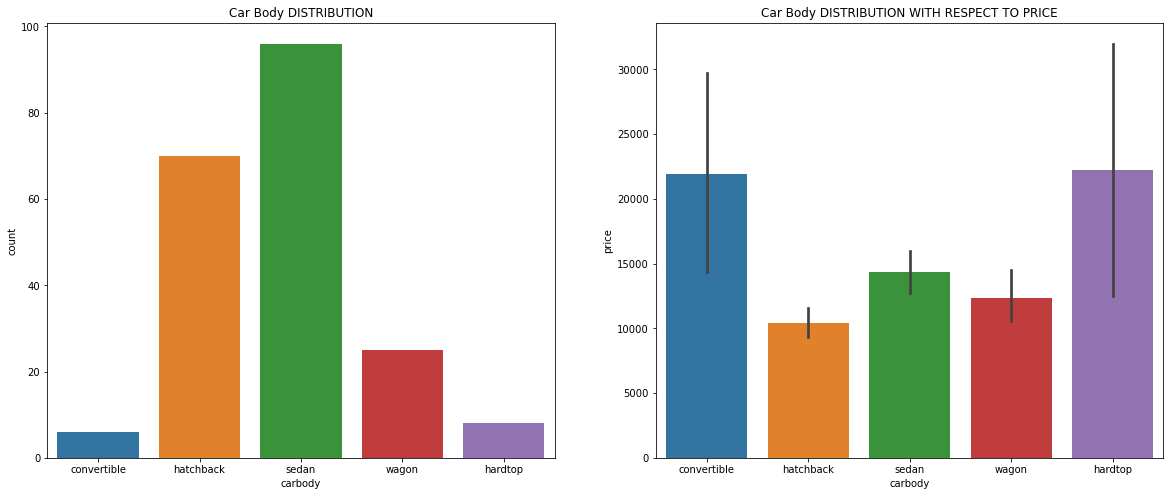

In [205]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Car Body DISTRIBUTION")
sns.countplot(df['carbody'],data=df)

plt.subplot(1,2,2)
plt.title("Car Body DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['carbody'],df['price'],data=df);

Insights

* most of the car is sedan

* but price of hardtop car is high

In [206]:
df.head(2)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


7 Visualize drivewheel feature

In [207]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

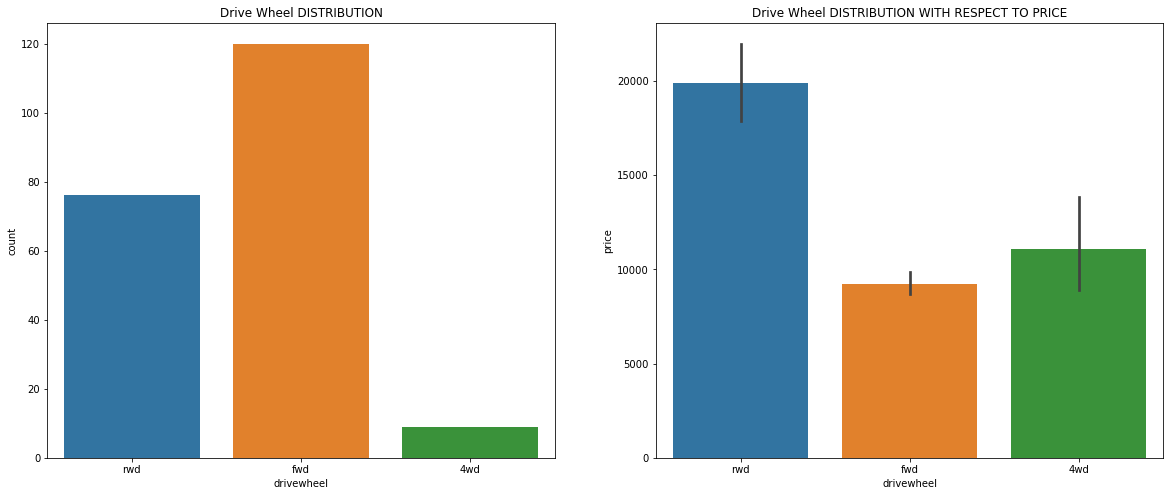

In [208]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Drive Wheel DISTRIBUTION")
sns.countplot(df['drivewheel'],data=df)

plt.subplot(1,2,2)
plt.title("Drive Wheel DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['drivewheel'],df['price'],data=df);

Insights

* most of the car is FWD

* but price is highest for RWD

8 Visualize Engine location feature

In [209]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

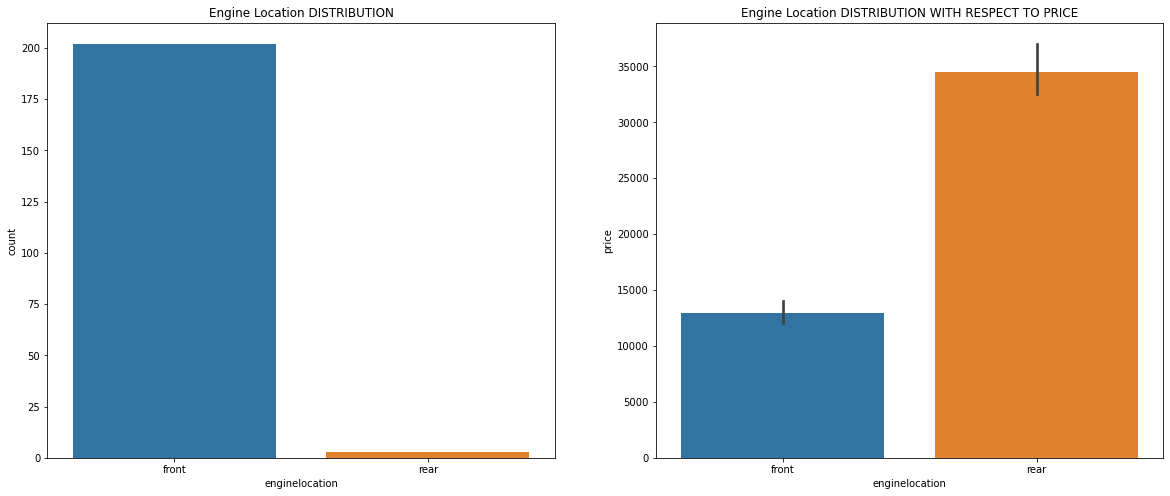

In [210]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Engine Location DISTRIBUTION")
sns.countplot(df['enginelocation'],data=df)

plt.subplot(1,2,2)
plt.title("Engine Location DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['enginelocation'],df['price'],data=df);

Insights

* most of the car has front engine location
* but price for rear engine location car is highest

9. Visualize Engine Type

In [211]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

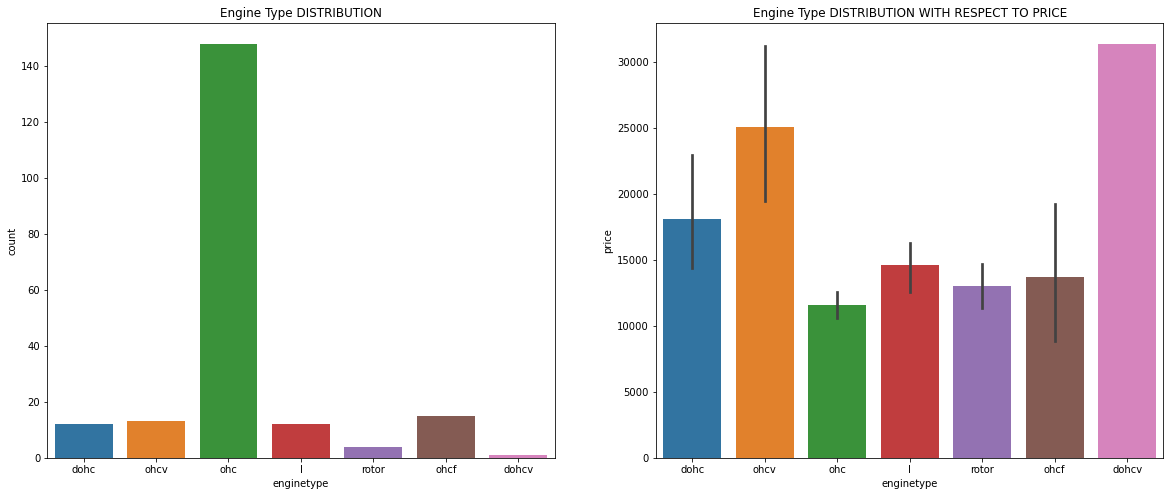

In [212]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Engine Type DISTRIBUTION")
sns.countplot(df['enginetype'],data=df)

plt.subplot(1,2,2)
plt.title("Engine Type DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['enginetype'],df['price'],data=df);

Insights

* most of the car has DHC engine type
* but price for DOHCV engine typecar is highest

In [213]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


10 Visualize Cylinder Number feature

In [214]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

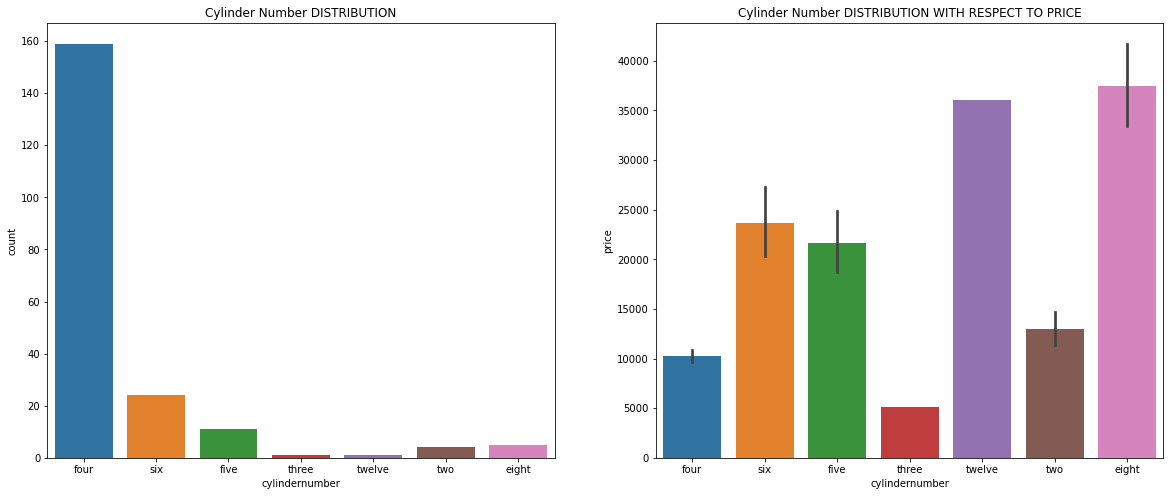

In [215]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Cylinder Number DISTRIBUTION")
sns.countplot(df['cylindernumber'],data=df)

plt.subplot(1,2,2)
plt.title("Cylinder Number DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['cylindernumber'],df['price'],data=df);

Insights

most of the car has four cylinder
but price for eight cylinder car is highest

11. visualize fuelsystem feature

In [216]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

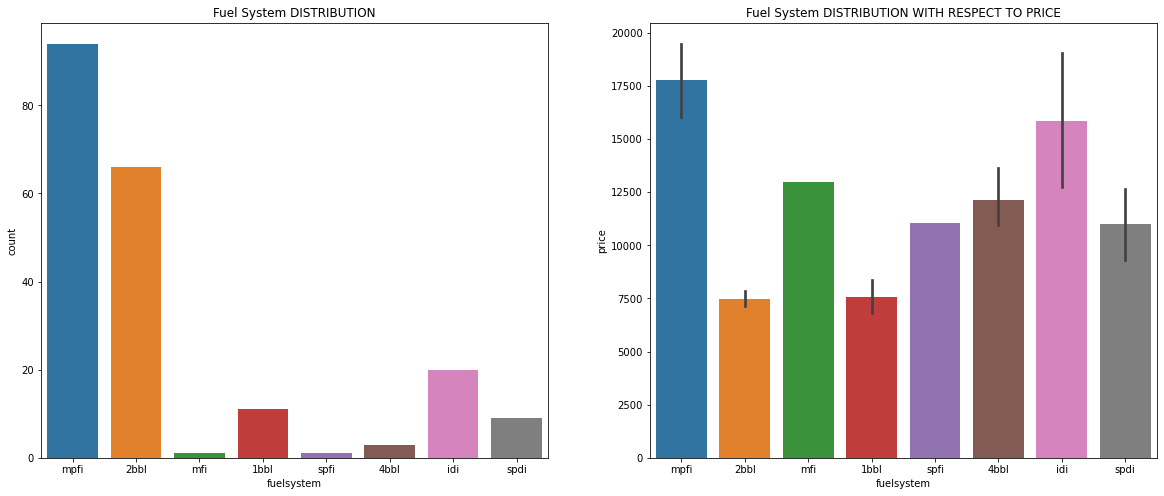

In [217]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Fuel System DISTRIBUTION")
sns.countplot(df['fuelsystem'],data=df)

plt.subplot(1,2,2)
plt.title("Fuel System DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['fuelsystem'],df['price'],data=df);

Insights

most of the car has MPFI fuel system

And price for MPFI fuel system car is highest

# Visualizing Numerical Features

In [218]:
df.head(2)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


12 Visualize Wheel Base feature

In [219]:
fig = px.scatter(df, x="wheelbase", y="price", title="Wheel Base DISTRIBUTION WITH RESPECT TO PRICE")
fig.show()


13 visualize carlength  carwidth  carheight Features

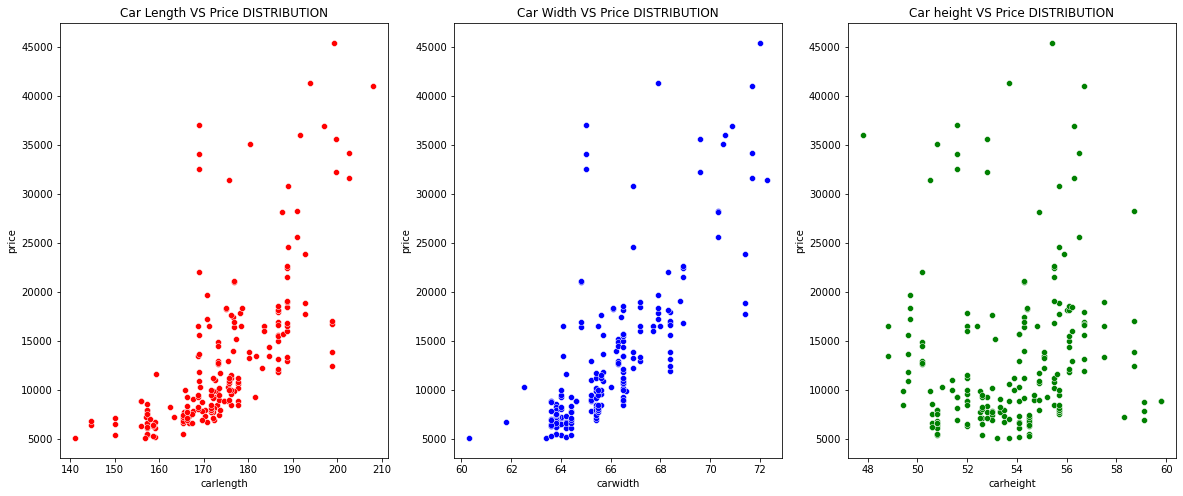

In [220]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title("Car Length VS Price DISTRIBUTION")
sns.scatterplot(df['carlength'],df['price'],color="red",data=df)

plt.subplot(1,3,2)
plt.title("Car Width VS Price DISTRIBUTION")
sns.scatterplot(df['carwidth'],df['price'],color="blue",data=df);

plt.subplot(1,3,3)
plt.title("Car height VS Price DISTRIBUTION")
sns.scatterplot(df['carheight'],df['price'],color='green',data=df);

14 visualize curbweight feature

In [221]:
fig = px.scatter(df, x="curbweight", y="price", title="Curb weight DISTRIBUTION WITH RESPECT TO PRICE")
fig.show()

15 visualize enginesize feature

In [222]:
fig = px.scatter(df, x="enginesize", y="price", title="Engine Size DISTRIBUTION WITH RESPECT TO PRICE")
fig.show()

In [223]:
df.head(2)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


16 visualize boreratio...	stroke... feature

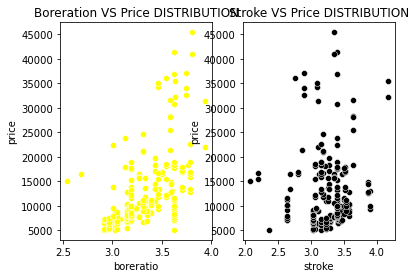

In [224]:
plt.subplot(1,2,1)
plt.title("Boreration VS Price DISTRIBUTION")
sns.scatterplot(df['boreratio'],df['price'],color="yellow",data=df)

plt.subplot(1,2,2)
plt.title("Stroke VS Price DISTRIBUTION")
sns.scatterplot(df['stroke'],df['price'],color="black",data=df);

17  visualization compressionratio...	horsepower... Features

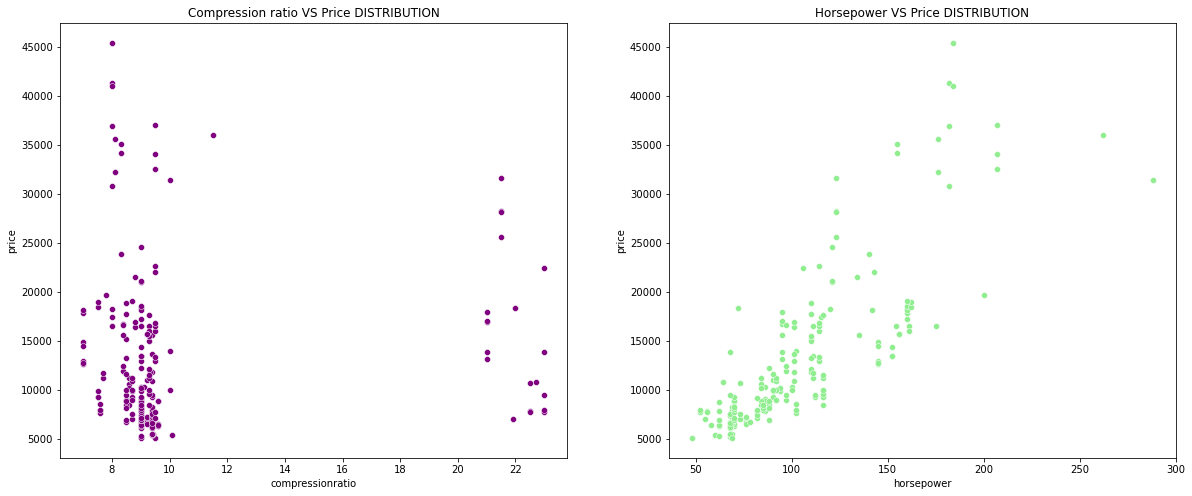

In [225]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Compression ratio VS Price DISTRIBUTION")
sns.scatterplot(df['compressionratio'],df['price'],color='purple',data=df);

plt.subplot(1,2,2)
plt.title("Horsepower VS Price DISTRIBUTION")
sns.scatterplot(df['horsepower'],df['price'],color='lightgreen',data=df);

18 Visualizing peakrpm  	citympg 	highwaympg features

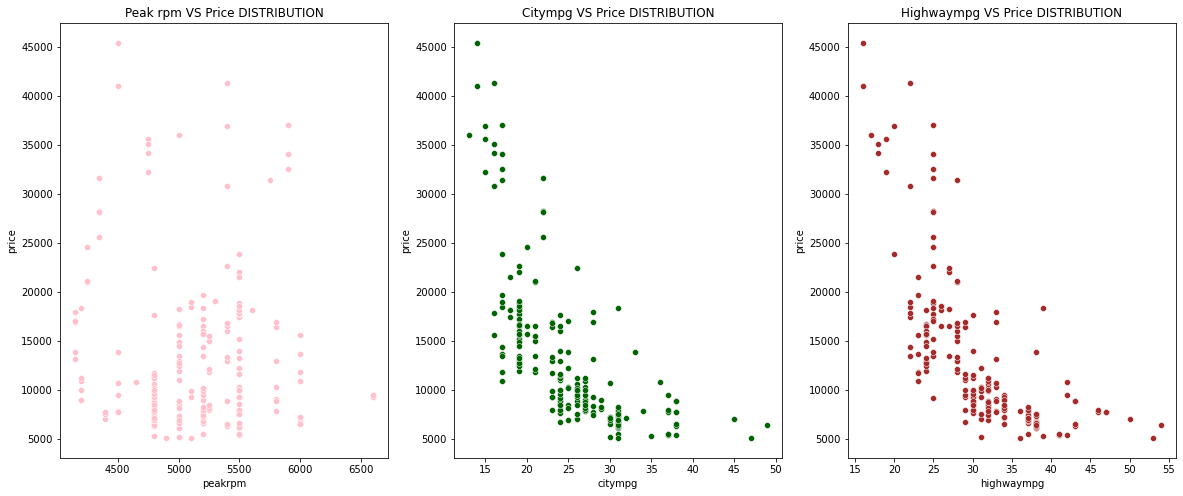

In [226]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title("Peak rpm VS Price DISTRIBUTION")
sns.scatterplot(df['peakrpm'],df['price'],color="pink",data=df)

plt.subplot(1,3,2)
plt.title("Citympg VS Price DISTRIBUTION")
sns.scatterplot(df['citympg'],df['price'],color="darkgreen",data=df);

plt.subplot(1,3,3)
plt.title("Highwaympg VS Price DISTRIBUTION")
sns.scatterplot(df['highwaympg'],df['price'],color='brown',data=df);

19 visualizing total number of car sold by different companies

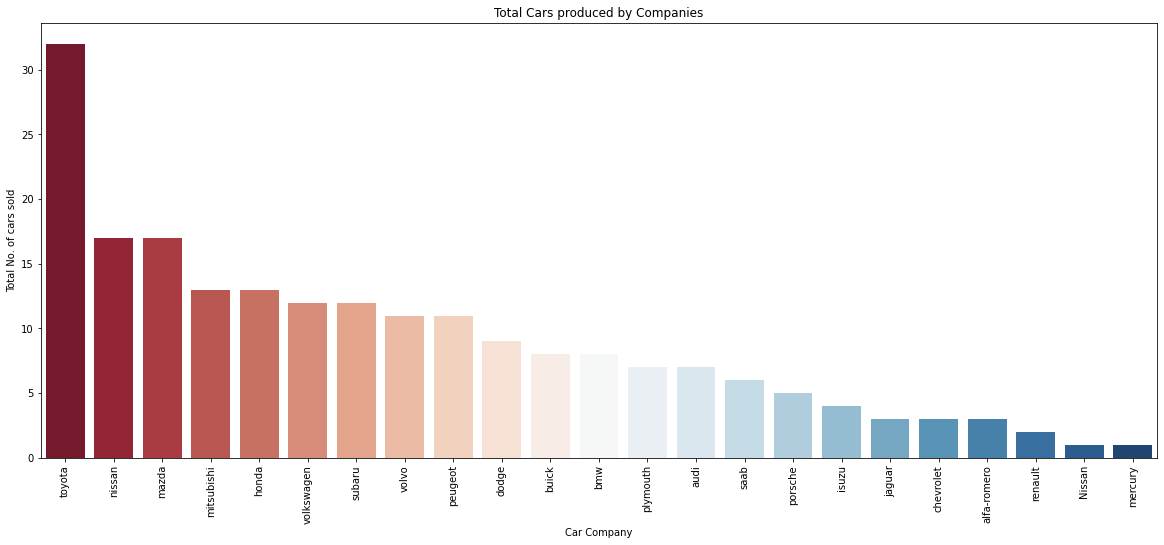

In [238]:
plt.figure(figsize=(20,8))
sns.barplot(df["CompanyName"].value_counts().keys(),df["CompanyName"].value_counts().values,palette="RdBu")
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies")
plt.xticks(rotation=90)
plt.show()

Insights

* Toyota company has sold the highest number of cars.
* Nisaan ,Mercury or renault are having very low data-points. So we can't make any inference of least sold car companies.

# 20 visualizing car company vs price

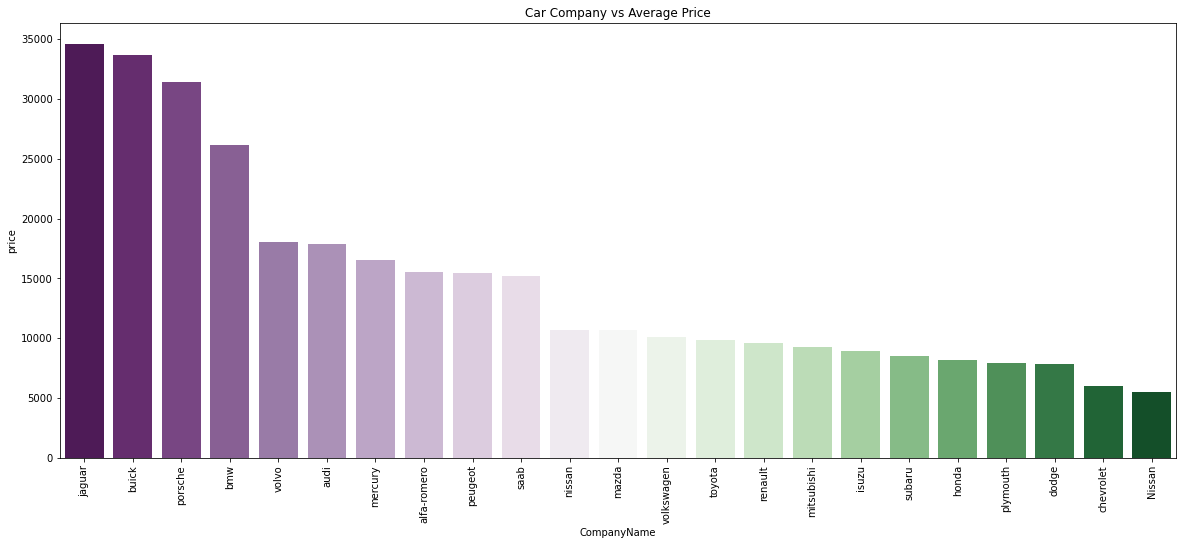

In [243]:
plt.figure(figsize=(20,8))
x=pd.DataFrame(df.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x.index,x["price"],palette="PRGn") 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price")
plt.show()

Insights

* Jaguar & buick seems to have the highest price range cars.
* nissan has lowest price range car

# Data Preprocessiong

new dataframe of useful features for model building

In [247]:
df1 = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price']]

make dummies for categorical features

In [248]:
df1 = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem"],data=df1)

In [251]:
df1.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# FEATURE SELECTION FOR TRAING AND TESTING OF MODEL

In [252]:
df1.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [253]:
x=df1.drop(columns=["price"])
y=df1["price"]

train test splitting

In [254]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [255]:
x_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,104.9,175.0,66.1,2700,134,3.43,72,31,39,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
111,107.9,186.7,68.4,3075,120,3.46,95,19,24,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
153,95.7,169.7,63.6,2280,92,3.05,62,31,37,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
96,94.5,165.3,63.8,1971,97,3.15,69,31,37,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
38,96.5,167.5,65.2,2289,110,3.15,86,27,33,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
24,93.7,157.3,63.8,1967,90,2.97,68,31,38,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
139,93.7,157.9,63.6,2120,108,3.62,73,26,31,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
112,107.9,186.7,68.4,3252,152,3.70,95,28,33,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
29,95.9,173.2,66.3,2811,156,3.60,145,19,24,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
19,94.5,155.9,63.6,1874,90,3.03,70,38,43,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [256]:
x_test

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
15,103.5,189.0,66.9,3230,209,3.62,182,16,22,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9,99.5,178.2,67.9,3053,131,3.13,160,16,22,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
100,97.2,173.4,65.2,2302,120,3.33,97,27,34,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
132,99.1,186.6,66.5,2658,121,3.54,110,21,28,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
68,110.0,190.9,70.3,3750,183,3.58,123,22,25,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
95,94.5,165.6,63.8,2028,97,3.15,69,31,37,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
159,95.7,166.3,64.4,2275,110,3.27,56,38,47,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
162,95.7,166.3,64.4,2140,98,3.19,70,28,34,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
147,97.0,173.5,65.4,2455,108,3.62,94,25,31,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
182,97.3,171.7,65.5,2261,97,3.01,52,37,46,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [257]:
y_train

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
24      6229.0
139     7053.0
112    16900.0
29     12964.0
19      6295.0
178    16558.0
90      7099.0
173     8948.0
93      7349.0
5      15250.0
167     8449.0
56     11845.0
128    37028.0
76      5389.0
144     9233.0
104    17199.0
177    11248.0
75     16503.0
174    10698.0
31      6855.0
12     20970.0
35      7295.0
125    22018.0
42     10345.0
156     6938.0
136    18150.0
140     7603.0
51      6095.0
113    16695.0
166     9538.0
41     12945.0
124    12764.0
78      6669.0
119     7957.0
26      7609.0
137    18620.0
200    16845.0
117    18150.0
2      16500.0
77      6189.0
46     11048.0
122     7609.0
127    34028.0
85      6989.0
138     5118.0
36      7295.0
114    17075.0
61     10595.0
22      6377.0
135    15510.0
192    13845.0
33      6529.0
11     16925.0
199    18950.0
163     8058.0
6      17710.0
27      8558.0
126    32528.0
196    15985.0
141     7126.0
4      17450.0
32      53

In [258]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
95      7799.000
159     7788.000
162     9258.000
147    10198.000
182     7775.000
191    13295.000
164     8238.000
65     18280.000
175     9988.000
73     40960.000
152     6488.000
18      5151.000
82     12629.000
86      8189.000
143     9960.000
60      8495.000
101    13499.000
98      8249.000
30      6479.000
25      6692.000
16     41315.000
168     9639.000
195    13415.000
97      7999.000
194    12940.000
67     25552.000
120     6229.000
154     7898.000
202    21485.000
79      7689.000
69     28176.000
145    11259.000
55     10945.000
45      8916.500
84     14489.000
146     7463.000
Name: price, dtype: float64

# model building

In [263]:
training_score=[]
testing_score=[]

In [276]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

Linear regression

In [265]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 92.52761715043437
r2_Score of LinearRegression() model on Testing Data is: 88.66738397403336


Decision Tree Regressor

In [266]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86537119069865
r2_Score of DecisionTreeRegressor() model on Testing Data is: 88.35294564478492


Random Forest Regressor

In [267]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.53048240532041
r2_Score of RandomForestRegressor() model on Testing Data is: 95.63265575821978


AdaBoost Regressor

In [268]:
model_prediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 95.73718735130048
r2_Score of AdaBoostRegressor() model on Testing Data is: 90.1816452457254


Gradient Boosting Regressor

In [269]:
model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.27586511528148
r2_Score of GradientBoostingRegressor() model on Testing Data is: 92.09962564584168


Cat Boost Regressor

In [270]:
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x000002829386F880> model on Training Data is: 99.66964225930734
r2_Score of <catboost.core.CatBoostRegressor object at 0x000002829386F880> model on Testing Data is: 94.23459506019563


XG boost Regreesor

In [271]:
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.8652201088386
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
       

Observation
* Highest performance was give by Random Forest Model around 95%%.

* But catboost & Gradient Boosting Model performance was also good.

* So we can use any of these three Models for predicting the price of car in future.

# Car Price Prediction system.

* First we did the Basic Understanding of Data

* Then we performed Data Cleaning to make the raw data more useable while analysis.

* Then we performed Exploratory Data Analysis to generate insights from the data.

* Then we performed Data Preprocessing to make data suitable for model training & testing.

* Then we trainined our model using different Machine Learning Algorithms.

* In the end we came with 95% accuracy which was given by RandomForestRegression.So we can use this model for predicting price of a car in future.